# Code for Chapter 2.  

Code for Chapter 2. Showcases tools for exploratory data analysis.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Snippet 1

In [2]:
import pandas as pd

df = pd.read_csv('data/01_heights_weights_genders.csv')

df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

## Snippet 2
Define our own mean and median functions.

In [3]:
def mean(x):
    return sum(x) / len(x)


def median(x):
    x = sorted(x)
    listlength = len(x) 
    num = listlength//2
    if listlength%2==0:
        middlenum = (x[num]+x[num-1])/2
    else:
        middlenum = x[num]
    return middlenum



## Snippet 3
Compare means and medians on toy examples.

In [4]:
myVector = range(1, 100)

myVector

range(1, 100)

In [5]:
mean(myVector)

50.0

In [6]:
median(myVector)

50

## Snippet 4
Confirm that our mean and median functions produce the correct answer.

In [7]:
import statistics 

mean(myVector) - statistics.mean(myVector)

0.0

In [8]:
median(myVector) - statistics.median(myVector)

0

## Snippet 5

Experiment with functions for assessing the range of a data set.

In [9]:
df['Height'].min()

54.2631333250971

## Snippet 6

In [10]:
df['Height'].max()

78.99874234638959

## Snippet 7

In [11]:
[df['Height'].min(), df['Height'].max()]

[54.2631333250971, 78.99874234638959]

## Snippet 8
Try out the quantile function for computing arbitrary quantiles.

In [12]:
df['Height'].describe(percentiles=[0, 0.25, 0.50, 0.75, 1])

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
0%          54.263133
25%         63.505620
50%         66.318070
75%         69.174262
100%        78.998742
max         78.998742
Name: Height, dtype: float64

## Snippet 9

In [13]:
import numpy as np
df['Height'].describe(percentiles=np.arange(0, 1, 0.2))

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
0%          54.263133
20%         62.859007
40%         65.194221
50%         66.318070
60.0%       67.435374
80%         69.811620
max         78.998742
Name: Height, dtype: float64

## Snippet 10

In [14]:
np.arange(0, 1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

## Snippet 11
Define a variance function to assess the spread of data.

In [15]:
def var(x):
    m = median(x)
    sum = 0
    for x_i in x:
        sum += (x_i - m)**2
    return sum / len(x)

## Snippet 12
Test our variance function for correctness.

In [16]:
np.var(df['Height']) - var(df['Height'])

-0.002449227737226778

## Snippet 13
Update the variance function to make it unbiased.

In [17]:
def var(x):
    m = median(x)
    sum = 0
    for x_i in x:
        sum += (x_i - m)**2
    return sum / (len(x) - 1)

In [18]:
# Test our variance function again for correctness.
np.var(df['Height']) - var(df['Height'])


-0.003929819948510271

## Snipet 14
Check the range predicted by the variance function.

In [19]:
heights = df['Height']
[mean(heights) - var(heights), mean(heights) + var(heights)]

[51.56163764199576, 81.17348186764636]

## Snippet 15

In [20]:
[mean(heights) - var(heights), mean(heights) + var(heights)]

[51.56163764199576, 81.17348186764636]

In [21]:
[heights.min(), heights.max()]

[54.2631333250971, 78.99874234638959]

## Snippet 16
Switch to standard deviations instead for thinking about ranges.

In [22]:
def sd(x):
    return np.sqrt(var(x))

## Snippet 17
Test our standard deviation function for correctness.

In [23]:
sd(heights) - np.std(heights)

0.0005106857595196246

## Snippet 18

In [24]:
[mean(heights) - sd(heights), mean(heights) + sd(heights)]

[62.51971332950399, 70.21540618013812]

In [25]:
[heights.min(), heights.max()]

[54.2631333250971, 78.99874234638959]

## Snippet 19

In [26]:
[mean(heights) - sd(heights), mean(heights) + sd(heights)]

[62.51971332950399, 70.21540618013812]

In [27]:
[np.percentile(heights, 25), np.percentile(heights, 75)]

[63.505620481218955, 69.1742617268347]

## Snippet 20

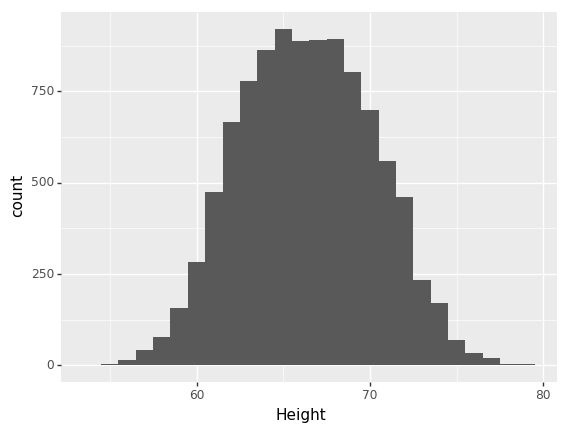

<ggplot: (-9223371901083479629)>

In [28]:
%matplotlib inline
from plotnine import *

fig = (
    ggplot(data = df) +
    geom_histogram(aes(x = 'Height'), binwidth = 1)
)

fig

## Snippet 21

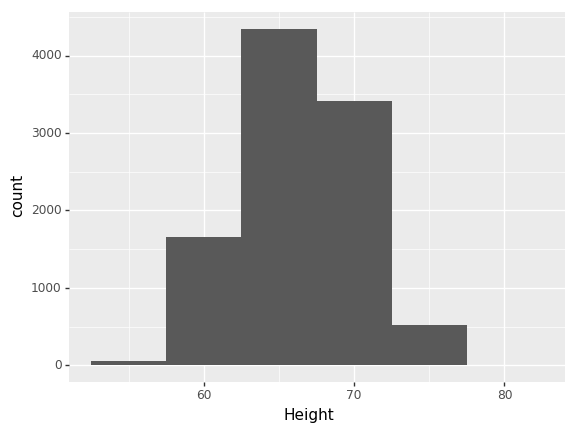

<ggplot: (-9223371901083370678)>

In [29]:
fig = (
    ggplot(data = df) +
    geom_histogram(aes(x = 'Height'), binwidth = 5)
)

fig

## Snippet 22

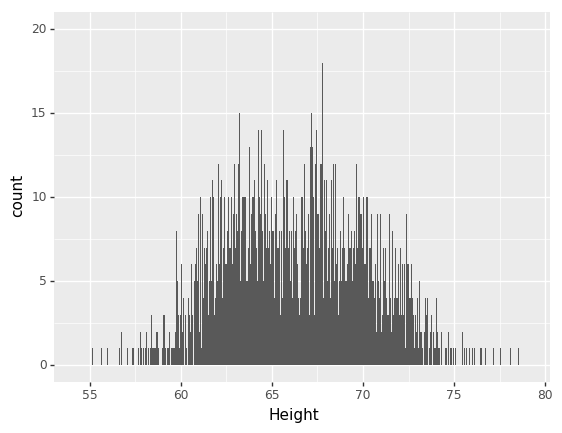

<ggplot: (135771602906)>

In [30]:
fig = (
    ggplot(data = df) +
    geom_histogram(aes(x = 'Height'), binwidth = 0.01)
)

fig

## Snippet 23
Experiment with kernel density estimates.

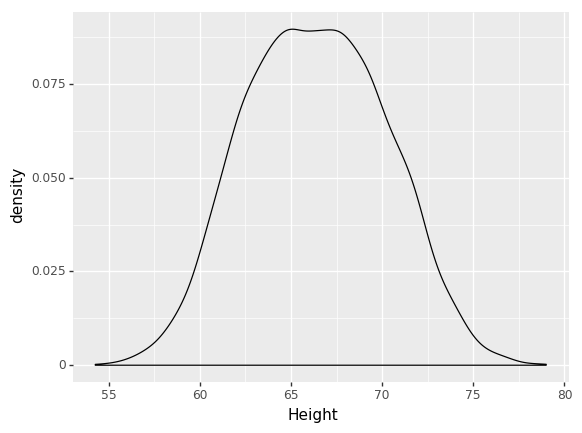

<ggplot: (135767905109)>

In [31]:
fig = (
    ggplot(data = df, mapping=aes(x = 'Height')) +
    geom_density()
)

fig

## Snippet 24
Separate out heights and weights based on gender.

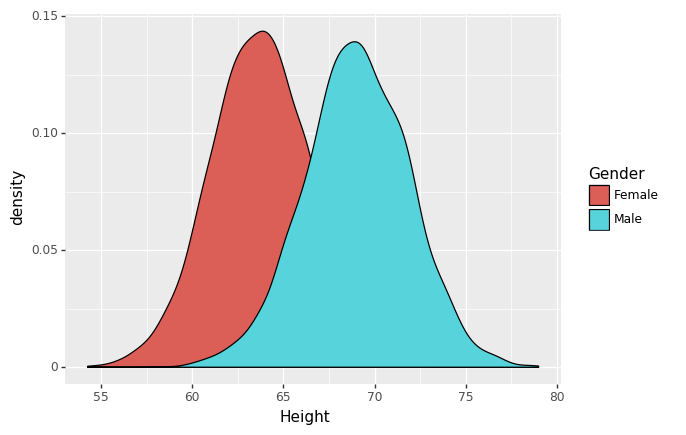

<ggplot: (-9223371901081741410)>

In [32]:
fig = (
    ggplot(data = df, mapping=aes(x = 'Height',  fill = 'Gender')) +
    geom_density()
)

fig

## Snippet 25

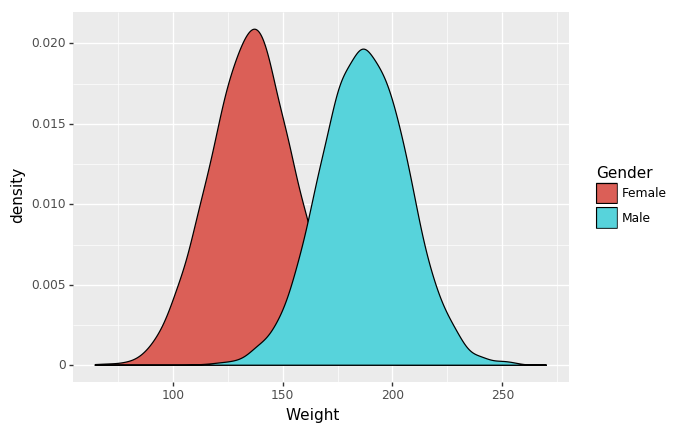

<ggplot: (-9223371901081778295)>

In [33]:
fig = (
    ggplot(data = df, mapping=aes(x = 'Weight',  fill = 'Gender')) +
    geom_density()
)

fig

## Snippet 26
Produce two facets in a single plot to make it easier to see the hidden structure.


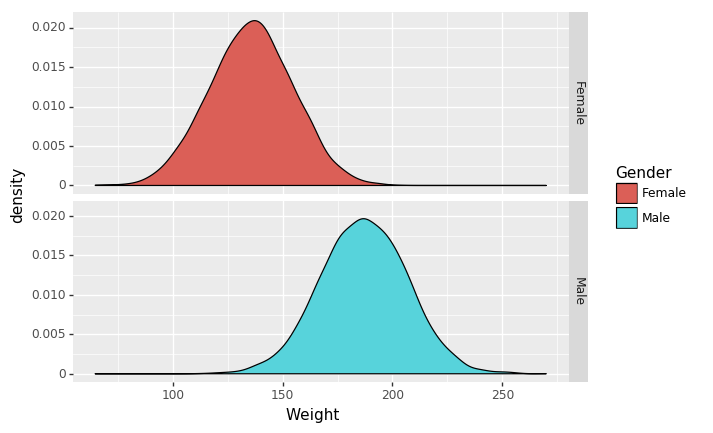

<ggplot: (135772739946)>

In [34]:
fig = (
    ggplot(data = df, mapping=aes(x = 'Weight',  fill = 'Gender')) +
    geom_density() + 
    facet_grid(('Gender', '.'))
)

fig

## Snippet 27
Experiment with random numbers from the normal distribution.

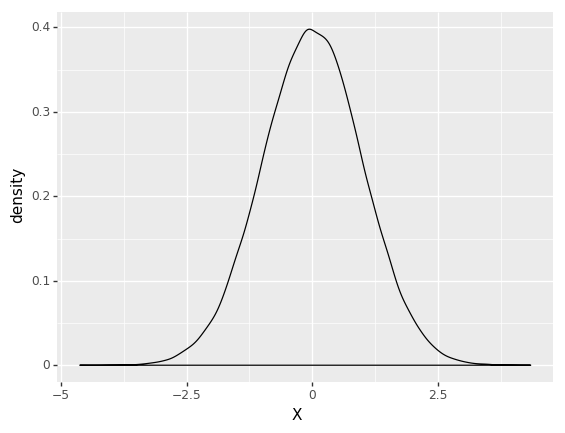

<ggplot: (135772786152)>

In [35]:
mean = 0
std = 1

data = np.random.normal(mean, std, 100000)
df_r = pd.DataFrame(data, columns = ['X'])

fig = (
    ggplot(data=df_r, mapping=aes(x = 'X')) +
    geom_density()
)

fig

## Snippet 28
Compare the normal distribution with the Cauchy distribution.


In [36]:
normal = np.random.normal(0, 1, 250)
cauchy = np.random.standard_cauchy(250)

print([normal.min(), normal.max()])
print([cauchy.min(), cauchy.max()])

[-2.3619752376042515, 2.7245956325982554]
[-191.94919978561708, 52.424126915086774]


## Snippet 29

In [37]:
fig1 = (
    ggplot(data=pd.DataFrame(normal, columns = ['X']), mapping=aes(x = 'X')) +
    geom_density()
)

fig2 = (
    ggplot(data=pd.DataFrame(cauchy, columns = ['X']), mapping=aes(x = 'X')) +
    geom_density()
)

## Snippet 30
Experiment with random numbers from the gamma distribution.

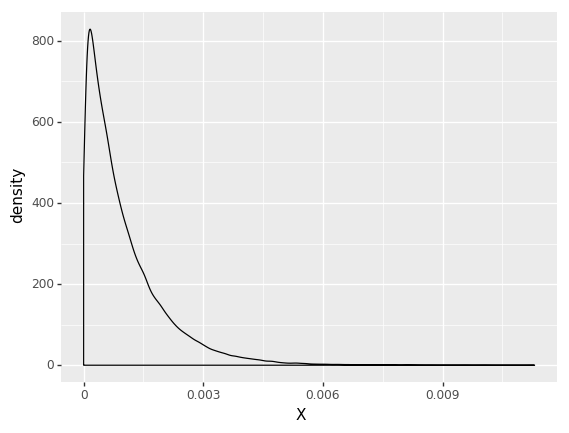

<ggplot: (135771621261)>

In [38]:
gamma = np.random.gamma(1, 0.001, 100000)
df_r = pd.DataFrame(gamma, columns = ['X'])

fig = (
    ggplot(data=df_r, mapping=aes(x = 'X')) +
    geom_density()
)

fig

## Snippet 31
Generate scatterplots of the heights and weights to see their relationship.

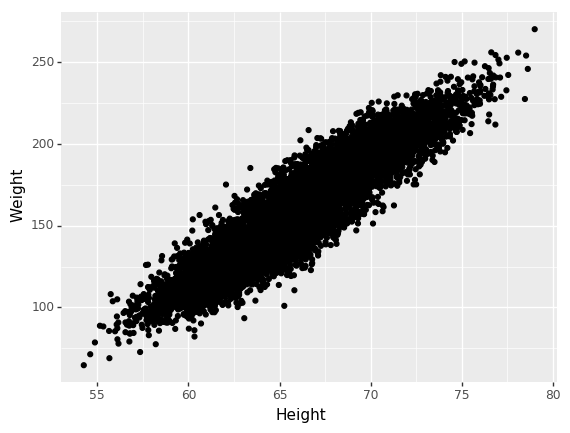

<ggplot: (-9223371901081989702)>

In [39]:
fig = (
    ggplot(data=df, mapping=aes(x = 'Height', y = 'Weight')) +
    geom_point()
)

fig

## Snippet 32
Add a smooth shape that relates the two explicitly.

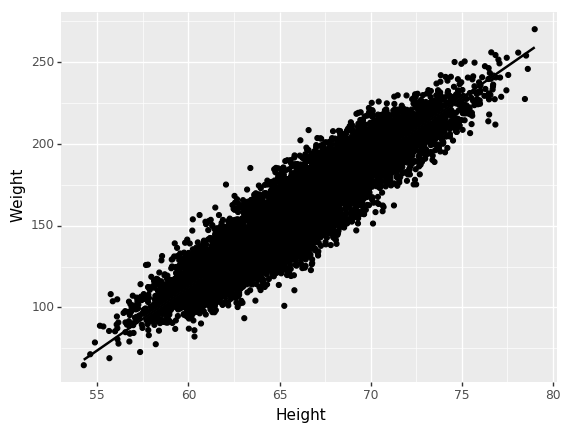

<ggplot: (-9223371901083113945)>

In [40]:
fig = (
    ggplot(data=df, mapping=aes(x = 'Height', y = 'Weight')) +
    geom_point() +
    geom_smooth()
)

fig

## Snippet 33
See how the smooth shape gets better with more data.

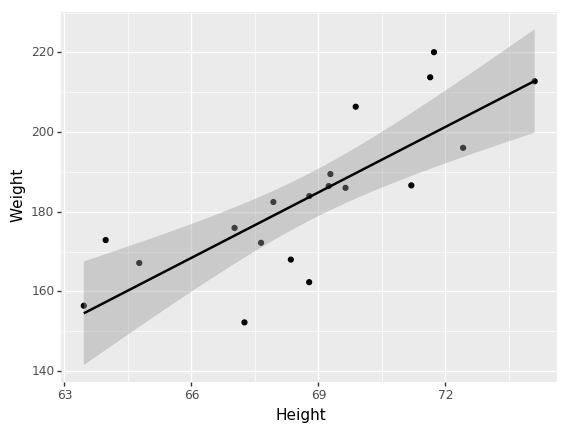

<ggplot: (-9223371901081779733)>

In [41]:
fig = (
    ggplot(data=df.iloc[1:20, : ], mapping=aes(x = 'Height', y = 'Weight')) +
    geom_point() +
    stat_smooth(method="lm")
)

fig

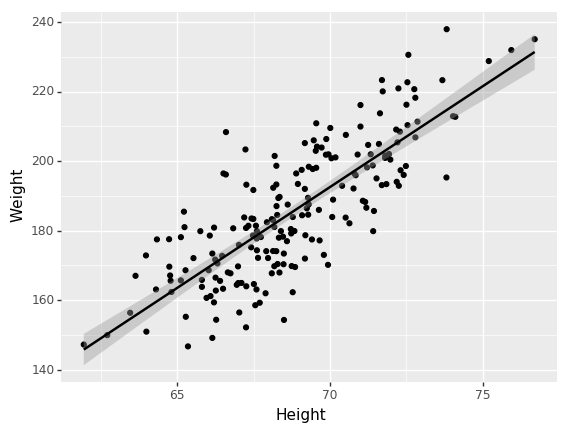

<ggplot: (-9223371901081738983)>

In [42]:
fig = (
    ggplot(data=df.iloc[1:200, : ], mapping=aes(x = 'Height', y = 'Weight')) +
    geom_point() +
    stat_smooth(method="lm")
)

fig

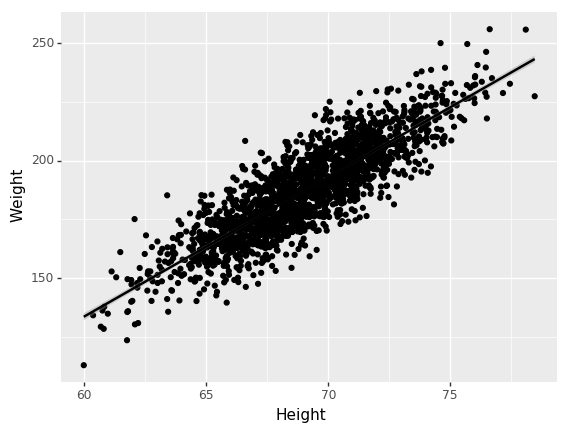

<ggplot: (135771658581)>

In [43]:
fig = (
    ggplot(data=df.iloc[1:2000, : ], mapping=aes(x = 'Height', y = 'Weight')) +
    geom_point() +
    stat_smooth(method="lm")
)

fig

## Snippet 34
Visualize how gender depends on height and weight.

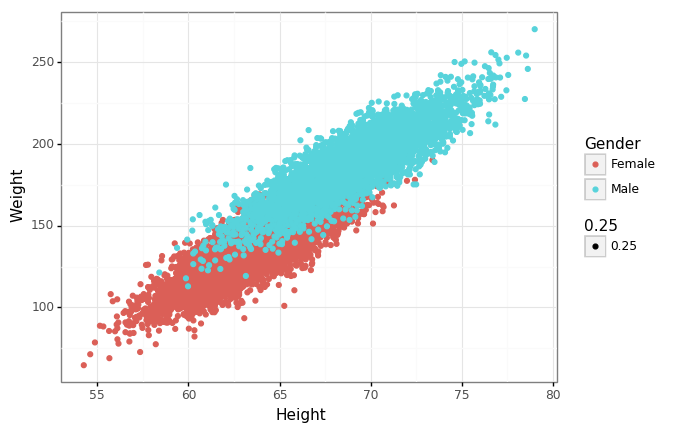

<ggplot: (135694418952)>

In [44]:
fig = (
    ggplot(data=df, mapping=aes(x = 'Height', y = 'Weight')) +
    geom_point(aes(color = 'Gender', alpha = 0.25)) +
    scale_alpha(range=(0.1, 1)) + 
    theme_bw()
)

fig